## Analysis of Student Achievement and Learning Patterns

### Objectives
   - Examine how different learning styles impact student academic performance.
   - Determine the most influential factors contributing to exam scores.
   - Build and assess the most effective machine learning model for predicting student exam score.
   - Generate insights to enhance teaching strategies by aligning them with student learning patterns.

### Dataset summary

Dataset: https://www.kaggle.com/code/samayashar/student-performance-linear-regression-svm-93?select=student_performance_large_dataset.csv

#### Features:

 1. **Student_ID** - Unique identifier for each student
 2. **Age** - Student's age
 3. **Gender** - Gender of the student (Male/Female)
 4. **Study_Hours_per_Week** - Number of hours spent studying per week
 5. **Preferred_Learning_Style** - Student's preferred learning style (e.g., Visual, Auditory, Kinesthetic, Reading/Writing)
 6. **Online_Courses_Completed** - Number of online courses completed
 7. **Participation_in_Discussions** - Whether the student participates in class discussions (Yes/No)
 8. **Assignment_Completion_Rate** (%) - Percentage of assignments completed
 9. **Exam_Score** (%) - Score obtained in exams (percentage) (Target variable)
 10. **Attendance_Rate** (%) - Percentage of attendance in classes
 11. **Use_of_Educational_Tech** - Whether the student uses educational technology (Yes/No)
 12. **Self_Reported_Stress_Level** - Student's self-reported stress level (Low/Medium/High)
 13. **Time_Spent_on_Social_Media** (hours/week) - Weekly hours spent on social media
 14. **Sleep_Hours_per_Night** - Average number of hours of sleep per night
 15. **Final_Grade** - The final grade obtained by the student

### Problem Statement
#### The target variable is Exam_Score

In [6]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
#Laoding the dataset
df = pd.read_csv(r"C:\Users\PRAVEEN\Downloads\student_performance_dataset.csv")
df

,Student_ID,Age,Gender,Study_Hours_per_Week,Preferred_Learning_Style,Online_Courses_Completed,Participation_in_Discussions,Assignment_Completion_Rate (%),Exam_Score (%),Attendance_Rate (%),Use_of_Educational_Tech,Self_Reported_Stress_Level,Time_Spent_on_Social_Media (hours/week),Sleep_Hours_per_Night,Final_Grade
0,S00001,18,Female,48,Kinesthetic,14,Yes,100,69,66,Yes,High,9,8,C
1,S00002,29,Female,30,Reading/Writing,20,No,71,40,57,Yes,Medium,28,8,D
2,S00003,20,Female,47,Kinesthetic,11,No,60,43,79,Yes,Low,13,7,D
3,S00004,23,Female,13,Auditory,0,Yes,63,70,60,Yes,Low,24,10,B
4,S00005,19,Female,24,Auditory,19,Yes,59,63,93,Yes,Medium,26,8,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,S09996,20,Male,30,Auditory,6,Yes,62,58,76,Yes,Medium,17,6,C
9996,S09997,23,Female,16,Visual,8,Yes,54,84,86,Yes,Medium,6,5,B
9997,S09998,26,Male,23,Visual,3,Yes,54,40,70,No,Medium,20,8,D
9998,S09999,18,Male,41,Reading/Writing,7,Yes,66,45,90,Yes,Low,6,8,D


In [10]:
#Printing the no.of rows and columns in the dataset
print("The dataset has" ,df.shape[0], "rows and ",df.shape[1], "columns.")

The dataset has 10000 rows and  15 columns.


#### The student_performance_dataset contains 10000 rows and 15 columns.

In [12]:
#Checking the informations about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Student_ID                               10000 non-null  object
 1   Age                                      10000 non-null  int64 
 2   Gender                                   10000 non-null  object
 3   Study_Hours_per_Week                     10000 non-null  int64 
 4   Preferred_Learning_Style                 10000 non-null  object
 5   Online_Courses_Completed                 10000 non-null  int64 
 6   Participation_in_Discussions             10000 non-null  object
 7   Assignment_Completion_Rate (%)           10000 non-null  int64 
 8   Exam_Score (%)                           10000 non-null  int64 
 9   Attendance_Rate (%)                      10000 non-null  int64 
 10  Use_of_Educational_Tech                  10000 non-null  ob

#### Dataset Summary
The dataset consists of 10,000 entries and 15 columns, containing information about students’ demographics, study habits, learning preferences, academic performance, and lifestyle factors. The dataset includes both numerical and categorical features.

**Data Types:**
- Numerical Columns (int64): 8 columns
- Categorical Columns (object): 7 columns

In [14]:
#Checking descriptive statistics
df.describe()

,Age,Study_Hours_per_Week,Online_Courses_Completed,Assignment_Completion_Rate (%),Exam_Score (%),Attendance_Rate (%),Time_Spent_on_Social_Media (hours/week),Sleep_Hours_per_Night
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,23.478800,27.130300,10.007900,74.922000,70.188900,75.085100,14.936500,6.979300
std,3.461986,13.002547,6.136726,14.675437,17.649447,14.749251,9.022639,1.996965
min,18.000000,5.000000,0.000000,50.000000,40.000000,50.000000,0.000000,4.000000
25%,20.000000,16.000000,5.000000,62.000000,55.000000,62.000000,7.000000,5.000000
50%,23.000000,27.000000,10.000000,75.000000,70.000000,75.000000,15.000000,7.000000
75%,27.000000,38.000000,15.000000,88.000000,85.000000,88.000000,23.000000,9.000000
max,29.000000,49.000000,20.000000,100.000000,100.000000,100.000000,30.000000,10.000000


- The dataset includes 10,000 students, with ages ranging from 18 to 29 years, and an average age of 23.5 years.
- On average, students study 27.1 hours per week, with some studying as little as 5 hours and others up to 49.
- The average exam score is 70.2%, showing a wide range of academic performance from 40% to 100%.
- Students spend around 15 hours per week on social media, which may influence both study time and sleep.
- The average sleep duration is 7 hours per night, with students sleeping between 4 and 10 hours.

In [16]:
#Identifying the numerical and categorical columns
num = df.select_dtypes(include = ['float64','int64'])
cat = df.select_dtypes(include = ['object'])
print("Numerical columns:",num.columns)
print("Categorical columns:",cat.columns)

Numerical columns: Index(['Age', 'Study_Hours_per_Week', 'Online_Courses_Completed',
       'Assignment_Completion_Rate (%)', 'Exam_Score (%)',
       'Attendance_Rate (%)', 'Time_Spent_on_Social_Media (hours/week)',
       'Sleep_Hours_per_Night'],
      dtype='object')
Categorical columns: Index(['Student_ID', 'Gender', 'Preferred_Learning_Style',
       'Participation_in_Discussions', 'Use_of_Educational_Tech',
       'Self_Reported_Stress_Level', 'Final_Grade'],
      dtype='object')


### Data Preprocessing

#### 1.Handling Missing Values

In [18]:
#Checking for missing values
df.isnull().sum()

Student_ID                                 0
Age                                        0
Gender                                     0
Study_Hours_per_Week                       0
Preferred_Learning_Style                   0
Online_Courses_Completed                   0
Participation_in_Discussions               0
Assignment_Completion_Rate (%)             0
Exam_Score (%)                             0
Attendance_Rate (%)                        0
Use_of_Educational_Tech                    0
Self_Reported_Stress_Level                 0
Time_Spent_on_Social_Media (hours/week)    0
Sleep_Hours_per_Night                      0
Final_Grade                                0
dtype: int64

**No Missing values are present in this dataset.**

#### 2. Handling Duplicated values

In [20]:
#Checking for duplicated values
df.duplicated().sum()

0

**No Duplicated values are present**

#### 3. Handling Skewness

In [22]:
#Checking skewness
df.select_dtypes("number").skew()

Age                                        0.008317
Study_Hours_per_Week                      -0.005068
Online_Courses_Completed                  -0.011526
Assignment_Completion_Rate (%)            -0.000160
Exam_Score (%)                            -0.014660
Attendance_Rate (%)                       -0.007214
Time_Spent_on_Social_Media (hours/week)    0.015387
Sleep_Hours_per_Night                      0.012452
dtype: float64

**All values are between -0.1 and 0.1, which means they are very close to normal distribution.**

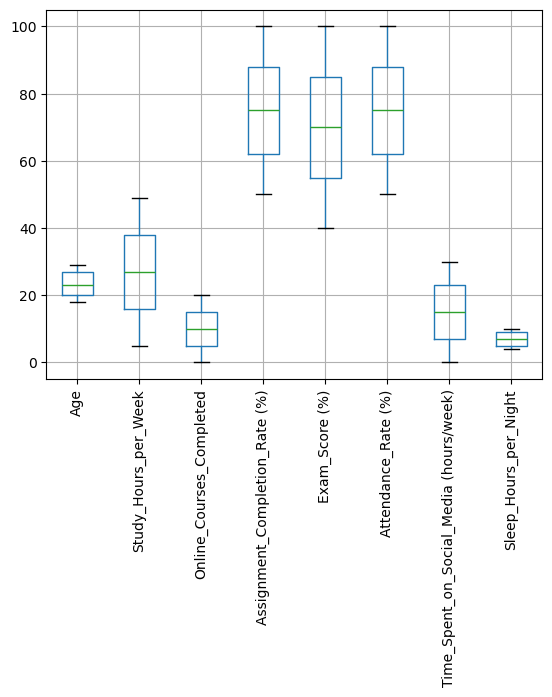

In [24]:
#Plotting the columns in a boxplot
df.boxplot()
plt.xticks(rotation = 90)
plt.show()

**Visualizing each numerical columns with boxplot**

In [26]:
x = list(df.select_dtypes(include = ['float64','int64']))
x

['Age',
 'Study_Hours_per_Week',
 'Online_Courses_Completed',
 'Assignment_Completion_Rate (%)',
 'Exam_Score (%)',
 'Attendance_Rate (%)',
 'Time_Spent_on_Social_Media (hours/week)',
 'Sleep_Hours_per_Night']

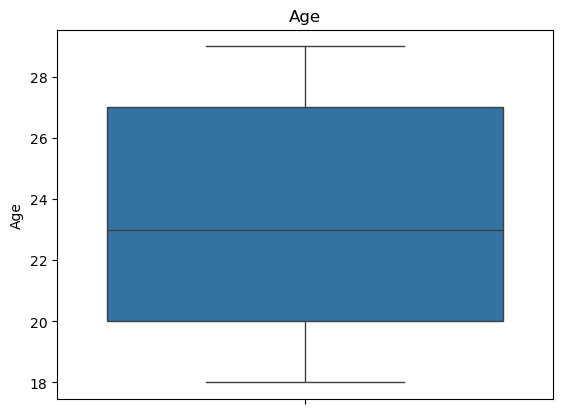

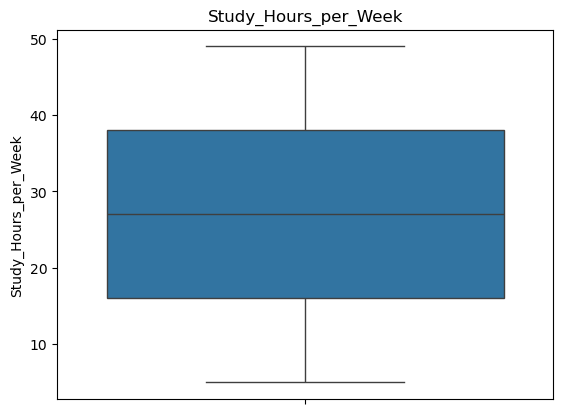

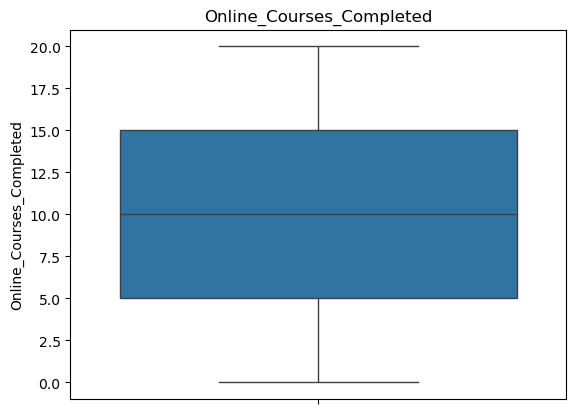

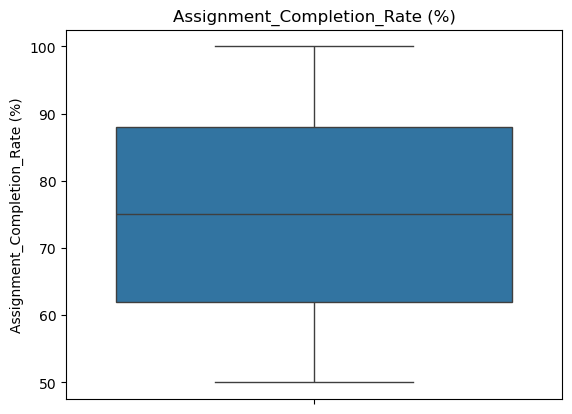

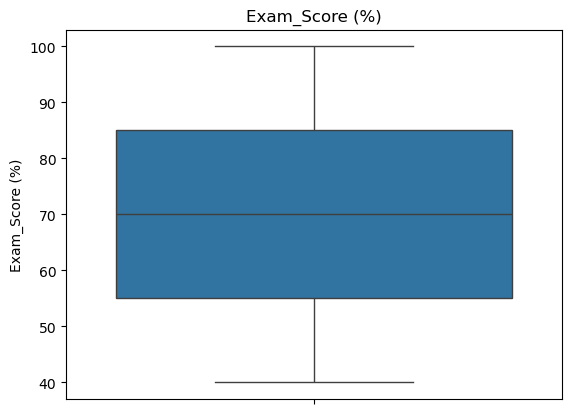

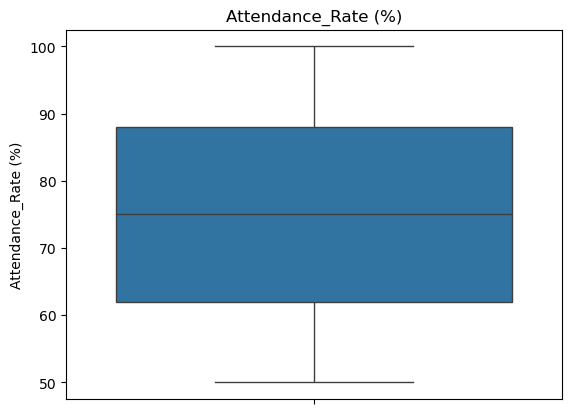

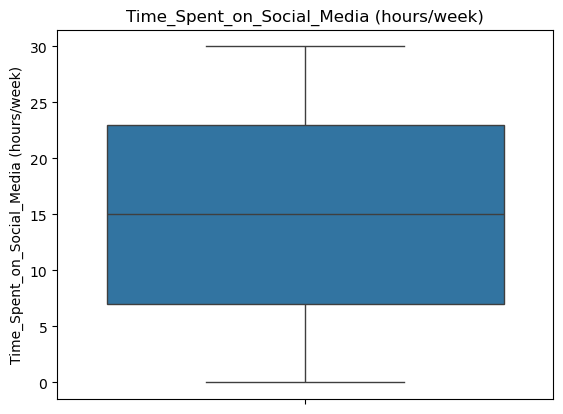

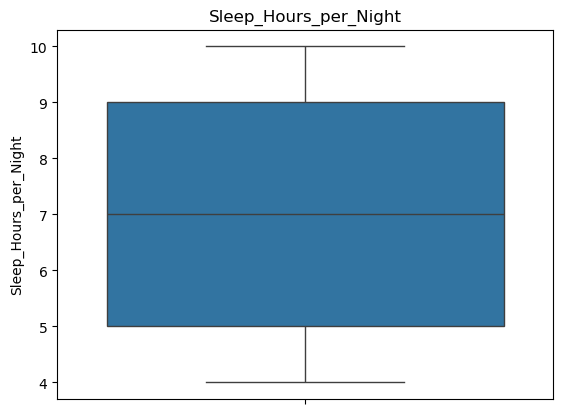

In [28]:
for i in x:
  sns.boxplot(df[i])
  plt.title(i)
  plt.show()

**Certain columns clearly contain outliers, which can be addressed using the capping method to reduce their impact.**

#### 4. Handling Outliers

In [30]:
def handle_outliers(df,columns):
  for i in columns:
    if df[i].dtype in ['float64','int64']:
      Q1 = df[i].quantile(0.25)    
      Q3 = df[i].quantile(0.75)    
      IQR = Q3-Q1
      lower_bound = Q1-1.5*IQR
      upper_bound = Q3+1.5*IQR
      #Clipping the outliers
      df[i] = np.where(df[i]<lower_bound,lower_bound,df[i])
  return df

In [32]:
df = handle_outliers(df,df.columns)
df.shape

(10000, 15)

In [34]:
#Checking skewness
df.select_dtypes(include=['float64','int64']).skew()

Age                                        0.008317
Study_Hours_per_Week                      -0.005068
Online_Courses_Completed                  -0.011526
Assignment_Completion_Rate (%)            -0.000160
Exam_Score (%)                            -0.014660
Attendance_Rate (%)                       -0.007214
Time_Spent_on_Social_Media (hours/week)    0.015387
Sleep_Hours_per_Night                      0.012452
dtype: float64

- The skewness values remain nearly the same, indicating that extreme outliers were not significantly impacting the distribution of the numerical features.
- This suggests that the numerical variables in the dataset are already fairly well-balanced in terms of distribution.

### Data Analysis

#### Exploratory Data Analysis (EDA)

In [36]:
#Identifying unique values
print(df.nunique())

Student_ID                                 10000
Age                                           12
Gender                                         3
Study_Hours_per_Week                          45
Preferred_Learning_Style                       4
Online_Courses_Completed                      21
Participation_in_Discussions                   2
Assignment_Completion_Rate (%)                51
Exam_Score (%)                                61
Attendance_Rate (%)                           51
Use_of_Educational_Tech                        2
Self_Reported_Stress_Level                     3
Time_Spent_on_Social_Media (hours/week)       31
Sleep_Hours_per_Night                          7
Final_Grade                                    4
dtype: int64


In [38]:
#Before moving to further analysis dropping the Student_ID column
df = df.drop(columns=['Student_ID'])

In [40]:
#Analysing the data statistics
df.describe()

,Age,Study_Hours_per_Week,Online_Courses_Completed,Assignment_Completion_Rate (%),Exam_Score (%),Attendance_Rate (%),Time_Spent_on_Social_Media (hours/week),Sleep_Hours_per_Night
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,23.478800,27.130300,10.007900,74.922000,70.188900,75.085100,14.936500,6.979300
std,3.461986,13.002547,6.136726,14.675437,17.649447,14.749251,9.022639,1.996965
min,18.000000,5.000000,0.000000,50.000000,40.000000,50.000000,0.000000,4.000000
25%,20.000000,16.000000,5.000000,62.000000,55.000000,62.000000,7.000000,5.000000
50%,23.000000,27.000000,10.000000,75.000000,70.000000,75.000000,15.000000,7.000000
75%,27.000000,38.000000,15.000000,88.000000,85.000000,88.000000,23.000000,9.000000
max,29.000000,49.000000,20.000000,100.000000,100.000000,100.000000,30.000000,10.000000


### Univariate Analysis

#### 1.Numerical Variables

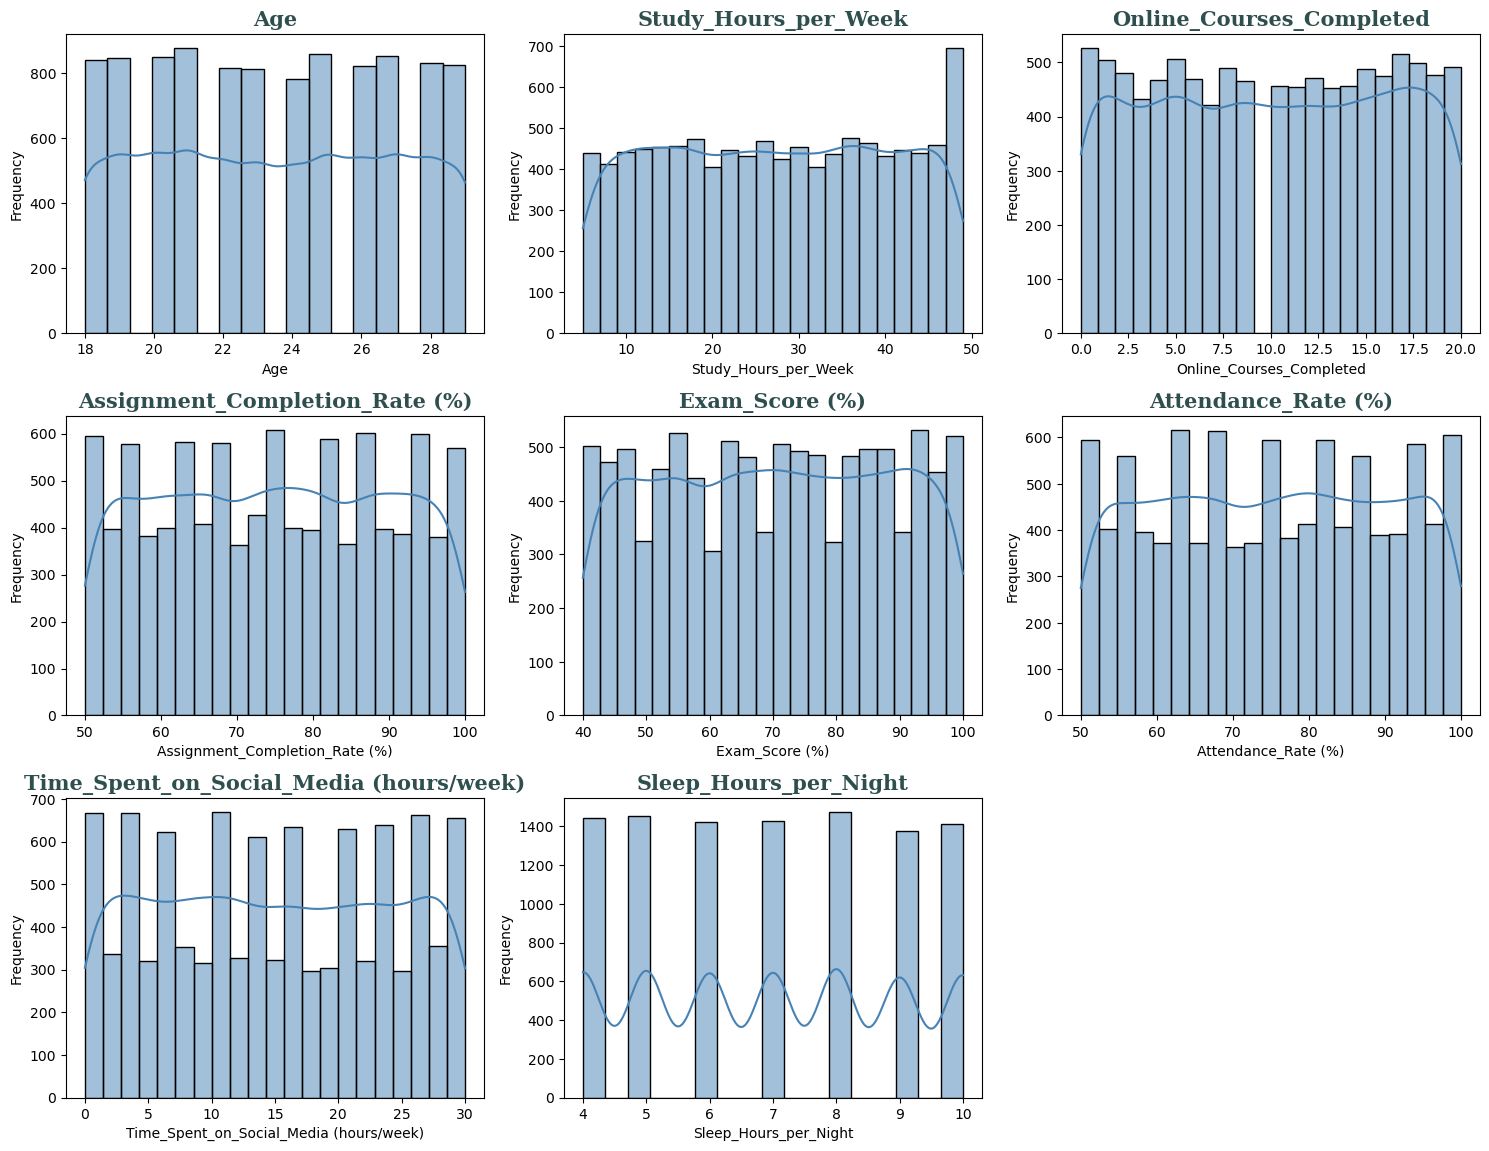

In [42]:
# Histplot
plt.figure(figsize=(15, 15))
title_font = {"family": "serif", "color": "darkslategray", "weight": "bold", "size": 15}
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(4, 3, i)
    sns.histplot(df[column], kde=True, color='steelblue')
    plt.title(column, fontdict=title_font)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.tight_layout()
plt.show()  

### Insights
- #### Age Distribution
  **Student ages range from 18 to 29, with a relatively even spread, indicating no particular age group dominates the dataset.**
- #### Study Hours per Week
  **Weekly study time varies between 10 and 50 hours, with a gradual rise in higher study hours, suggesting that some students are highly committed to their academics.**
- #### Online Courses Completed
  **The number of online courses completed ranges from 0 to 20, showing diverse engagement levels — from students who have not taken any to those actively involved in online learning.**
- #### Assignment Completion Rate(%)
  **Most students maintain a completion rate between 50% and 100%, with a noticeable concentration toward the higher end — reflecting strong consistency and dedication in coursework.**
- #### Exam Score(%)
  **Exam scores are spread across a broad range (40% to 100%), with no significant skew, indicating that student performance levels vary but are generally balanced.**
- #### Attendance Rate(%)
  **Attendance is predominantly above 50%, highlighting that most students regularly attend classes, with attendance trends leaning toward higher participation.**
- #### Time Spent on Social Media(hours/week)
  **Social media usage spans from 0 to 30 hours per week. The data reflects both minimal and excessive usage, showing varied online behavior among students.**
- #### Sleep Hours per Night
  **Students typically sleep between 6 and 10 hours nightly, with fewer individuals reporting 5 hours or less, suggesting that some students may not be getting adequate rest.**

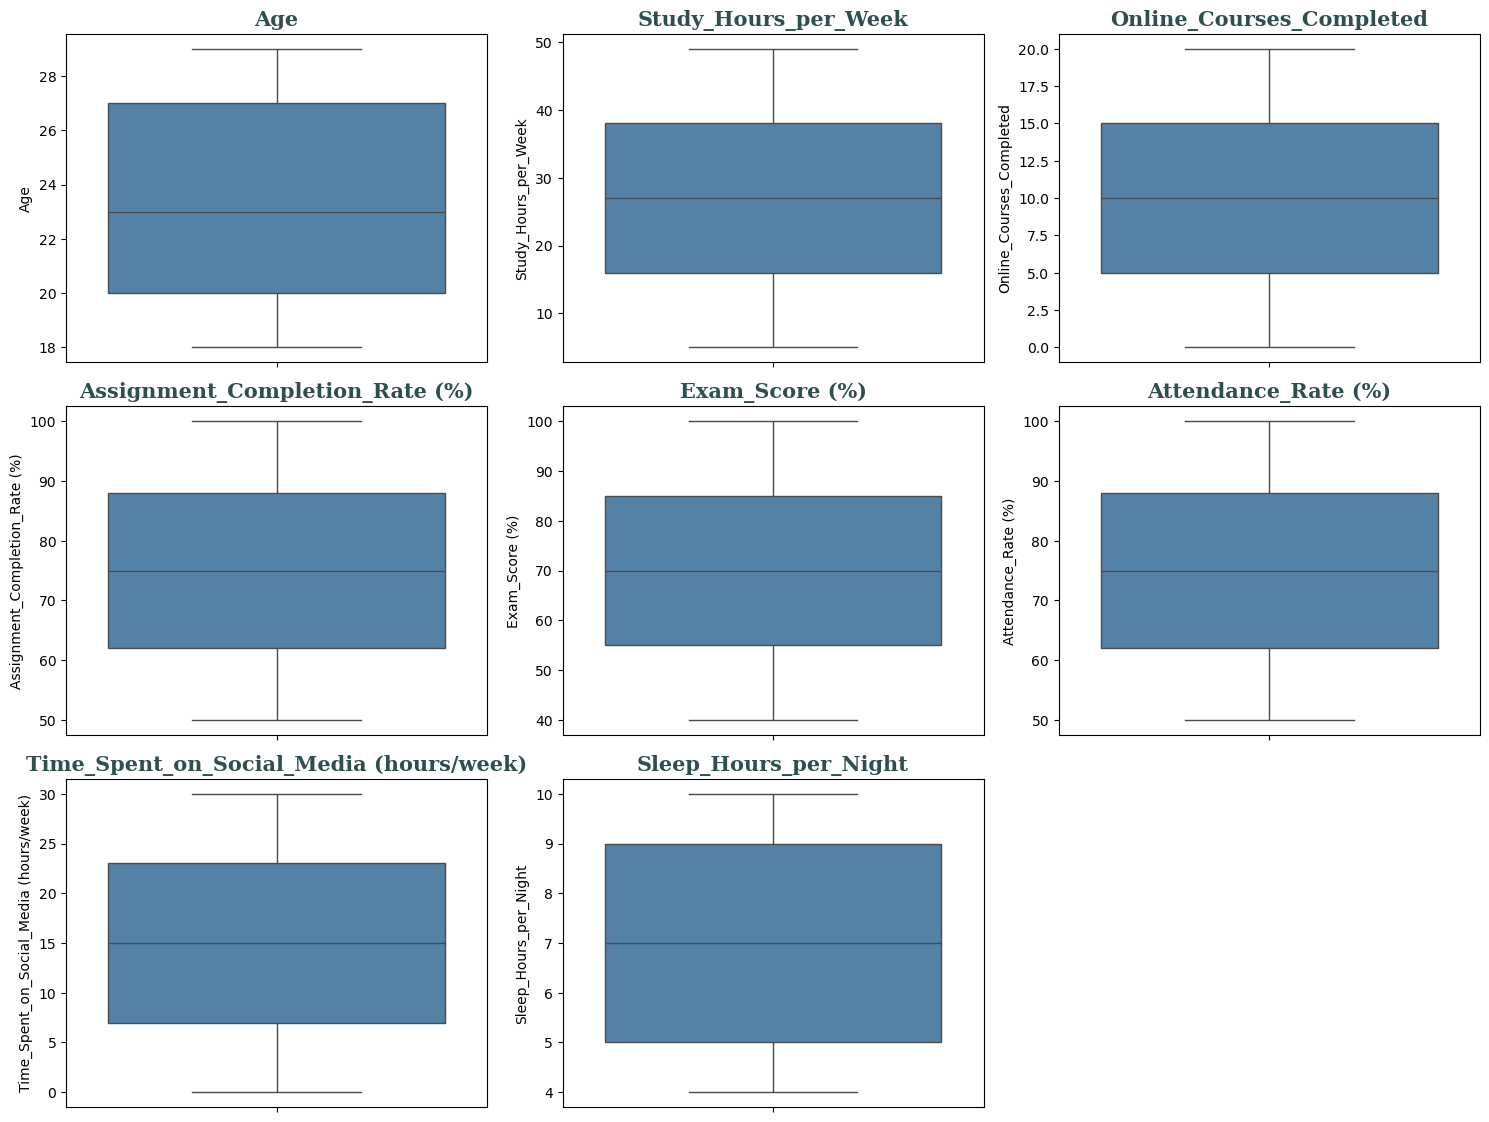

In [44]:
#BoxPlot
plt.figure(figsize=(15,15))
title_font={"family":"serif","color":"darkslategray","weight":"bold","size":15}
num = df.select_dtypes(include = ['float64','int64']).columns
for i,column in enumerate(num):
  plt.subplot(4,3,i+1)
  sns.boxplot(df[column],color = 'steelblue')
  plt.title(column,fontdict=title_font)
  plt.ylabel(column)
plt.tight_layout()
plt.show()

### Insights
- **Students who sleep longer may perform better academically, assuming a positive relationship exists between sleep duration and exam scores.**
- **High social media usage could be linked to lower study time or reduced exam performance, indicating it may serve as a potential distraction for some students.**
- **The generally high assignment completion rates reflect a strong sense of responsibility and engagement with coursework among the majority of students.**
- **The broad range in the number of online courses completed may reflect differences in students’ preferred learning methods or access to digital learning platforms.**

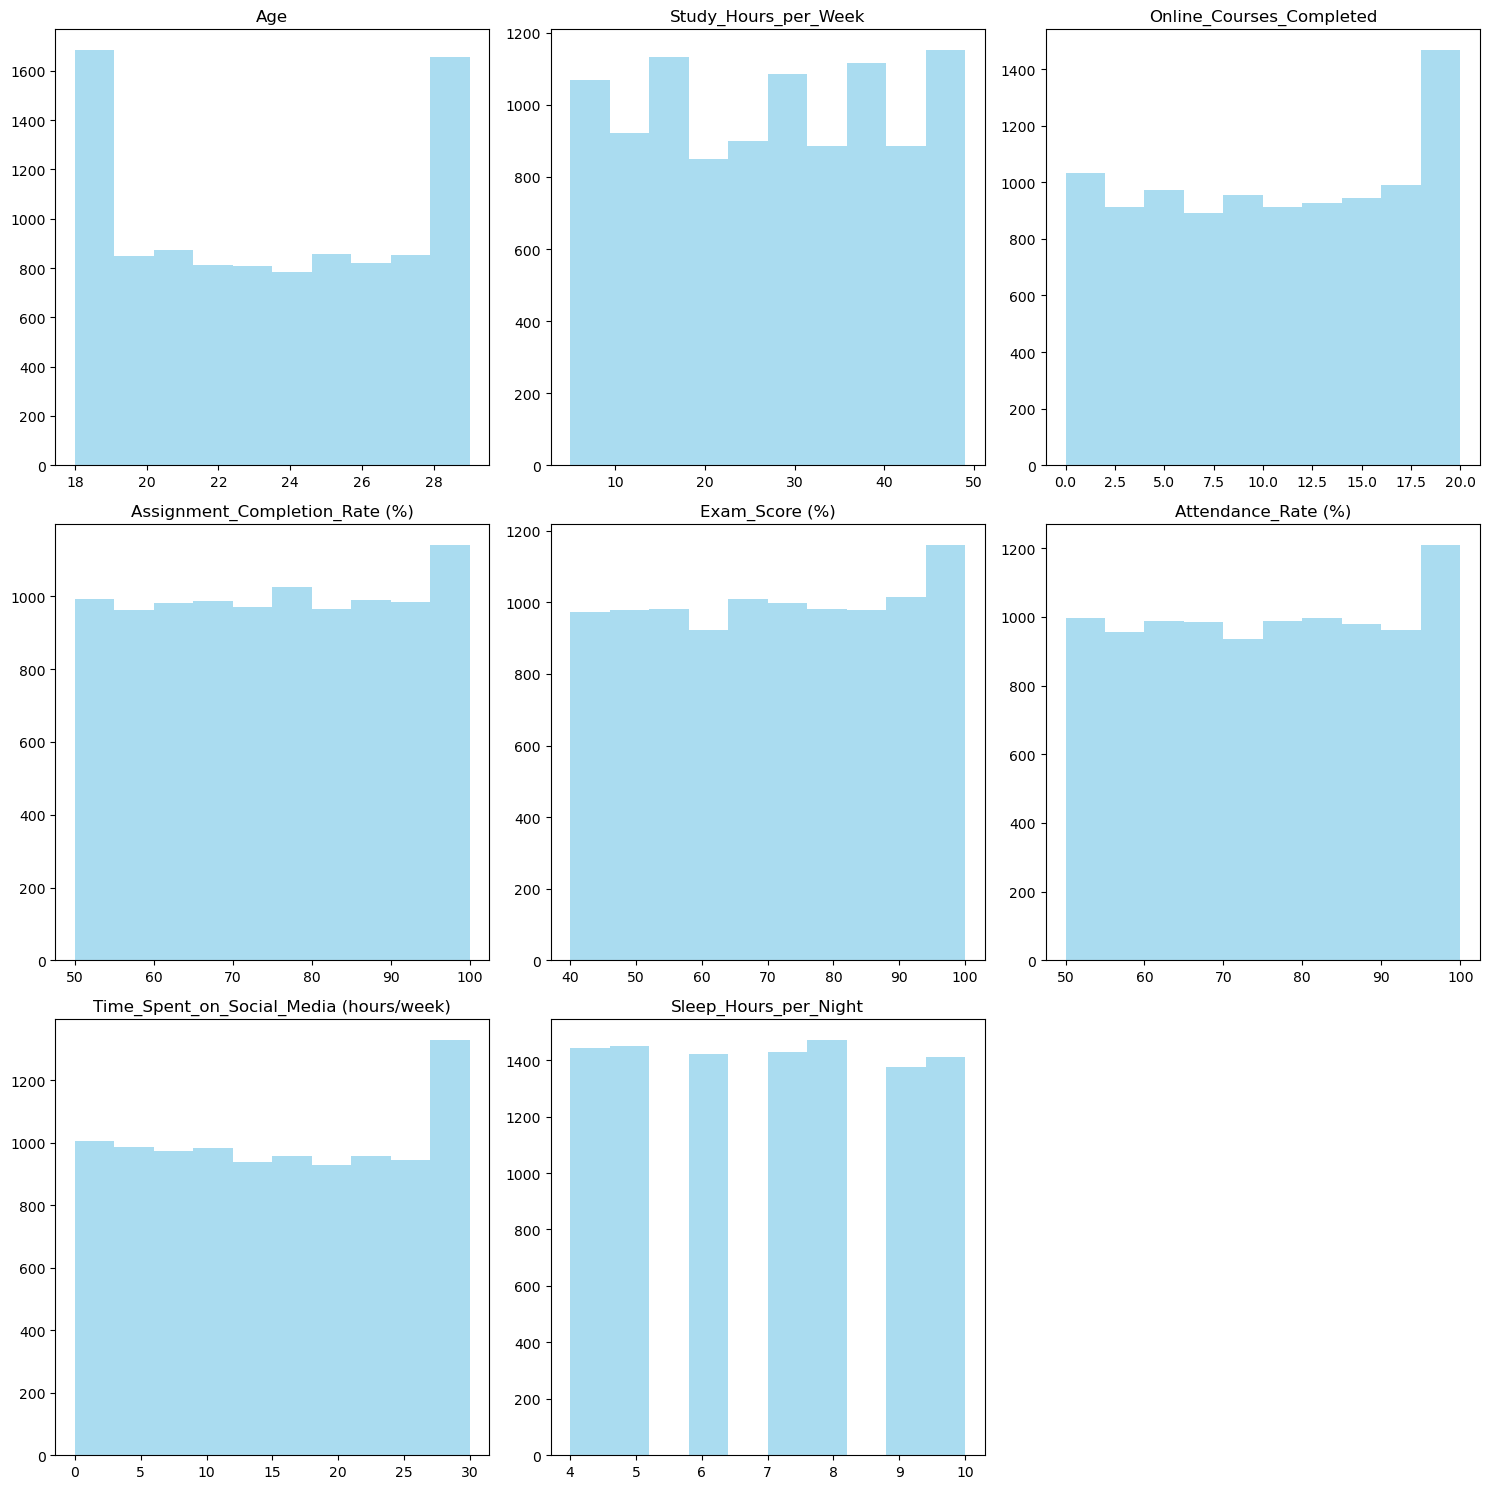

In [46]:
#Histogram
df.hist(figsize=(15,15),color = 'skyblue',alpha = 0.7, grid = False)
plt.tight_layout()
plt.show()

### Insights
- **Age**:The age distribution is relatively balanced, with noticeable peaks at 18 and 28 years,this suggests two dominant student groups.
- **Study Hours per Week**:Study hours appear to be evenly distributed, reflecting a wide range of study habits among students.
- **Online Courses Completed**:A significant number of students have either completed no courses or the maximum (20) courses, suggesting two contrasting patterns of online learning engagement.
- **Assignment Completion Rate & Attendance Rate**:Both metrics show a strong clustering near 100%, indicating that most students are consistent and committed to their academic responsibilities.
- **Exam Score**:Exam scores are fairly evenly spread, but there's a slight concentration near the top end, with more students scoring close to 100%.
- **Time Spent on Social Media**:Social media usage is broadly spread across students, highlighting diverse online behavior without a dominant trend.
- **Sleep Hours per Night**:The distribution of sleep hours shows distinct groupings around specific values like 6, 7, and 8 hours, suggesting students tend to follow fixed sleep routines rather than a continuous spread.

#### 2.Categorical Variables

In [48]:
categorical_columns = df.select_dtypes(include = ['object']).columns
categorical_columns

Index(['Gender', 'Preferred_Learning_Style', 'Participation_in_Discussions',
       'Use_of_Educational_Tech', 'Self_Reported_Stress_Level', 'Final_Grade'],
      dtype='object')

**Countplot for Categorical variables**

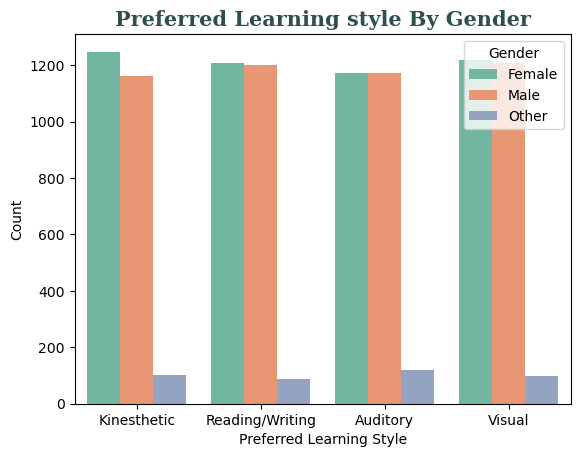

In [50]:
#Countplot for Preferred Learning style by different Gender
title_font={"family":"serif","color":"darkslategray","weight":"bold","size":15}
sns.countplot(x = df['Preferred_Learning_Style'],hue = df['Gender'],palette='Set2')
plt.title('Preferred Learning style By Gender',fontdict=title_font)
plt.xlabel('Preferred Learning Style')
plt.ylabel('Count')
plt.show()

### Insights
- **Gender Distribution**

  The number of male and female students is nearly equal across all learning styles. However, the "Other" gender category has notably fewer participants, indicating lower representation in the dataset.
 
- **Learning Style Preferences**

  All four learning styles—Kinesthetic, Reading/Writing, Auditory, and Visual—are evenly distributed across genders, showing no major gender-specific preference.

- **Kinesthetic and Visual Trends**

  There is a slight inclination among females toward Kinesthetic and Visual learning styles, though the difference is not substantial.

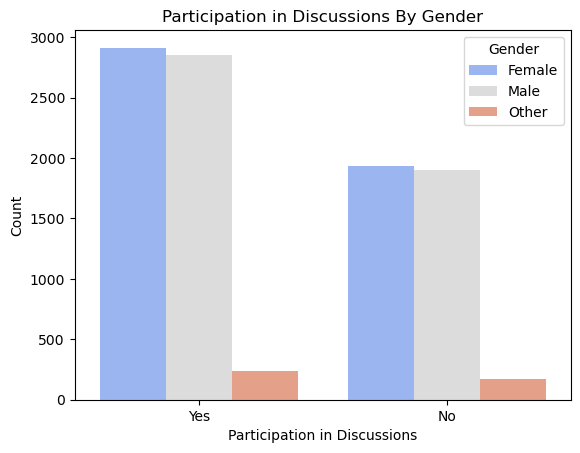

In [52]:
#Count plot for Participation in discussions by different Gender
sns.countplot(x = df['Participation_in_Discussions'],hue = df['Gender'],palette='coolwarm')
plt.title('Participation in Discussions By Gender')
plt.xlabel('Participation in Discussions')
plt.ylabel('Count')
plt.show()

### Insights
- A larger proportion of students actively participate in discussions compared to those who do not.
- Male and female students show nearly equal involvement, regardless of whether they participate in discussions or not.
- The 'Other' gender group is minimally represented in both participating and non-participating categories, indicating limited presence in the dataset.

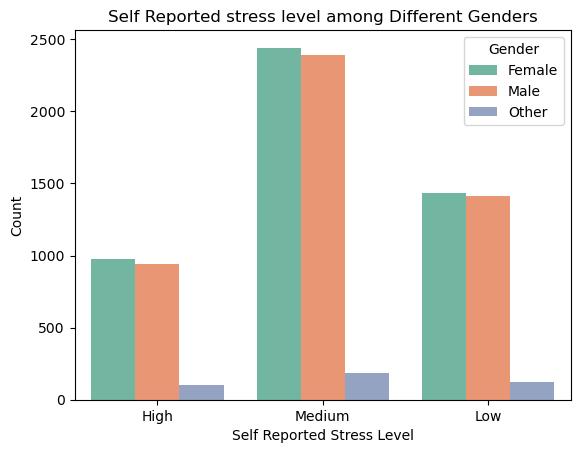

In [54]:
# count plot on Self Reported stress level
sns.countplot(x = df['Self_Reported_Stress_Level'],hue = df['Gender'],palette='Set2')
plt.title('Self Reported stress level among Different Genders')
plt.xlabel('Self Reported Stress Level')
plt.ylabel('Count')
plt.show()

### Insights
- Most students report experiencing a medium level of stress, making it the most common stress category across the dataset.
- Fewer students fall into the low-stress category, while a notable number still report high stress, indicating a significant variation in stress experiences.
- While the "Other" gender group has lower representation, their stress level distribution mirrors the overall trend, showing consistency across gender groups.

### Bivariate Analysis
#### Two Variables

In [56]:
# Correlation matrix
corr_matrix = df.select_dtypes(include = 'number').corr()
corr_matrix

,Age,Study_Hours_per_Week,Online_Courses_Completed,Assignment_Completion_Rate (%),Exam_Score (%),Attendance_Rate (%),Time_Spent_on_Social_Media (hours/week),Sleep_Hours_per_Night
Age,1.000000,-0.002108,-0.004895,-0.006275,0.001693,-0.014050,0.012660,0.012052
Study_Hours_per_Week,-0.002108,1.000000,0.025951,0.000894,0.004084,0.007768,0.010380,0.010908
Online_Courses_Completed,-0.004895,0.025951,1.000000,-0.000654,0.002070,0.001067,0.002619,-0.008139
Assignment_Completion_Rate (%),-0.006275,0.000894,-0.000654,1.000000,0.010470,0.000026,0.007933,0.009544
Exam_Score (%),0.001693,0.004084,0.002070,0.010470,1.000000,0.003717,0.000818,-0.016284
Attendance_Rate (%),-0.014050,0.007768,0.001067,0.000026,0.003717,1.000000,-0.013386,-0.005105
Time_Spent_on_Social_Media (hours/week),0.012660,0.010380,0.002619,0.007933,0.000818,-0.013386,1.000000,-0.001699
Sleep_Hours_per_Night,0.012052,0.010908,-0.008139,0.009544,-0.016284,-0.005105,-0.001699,1.000000


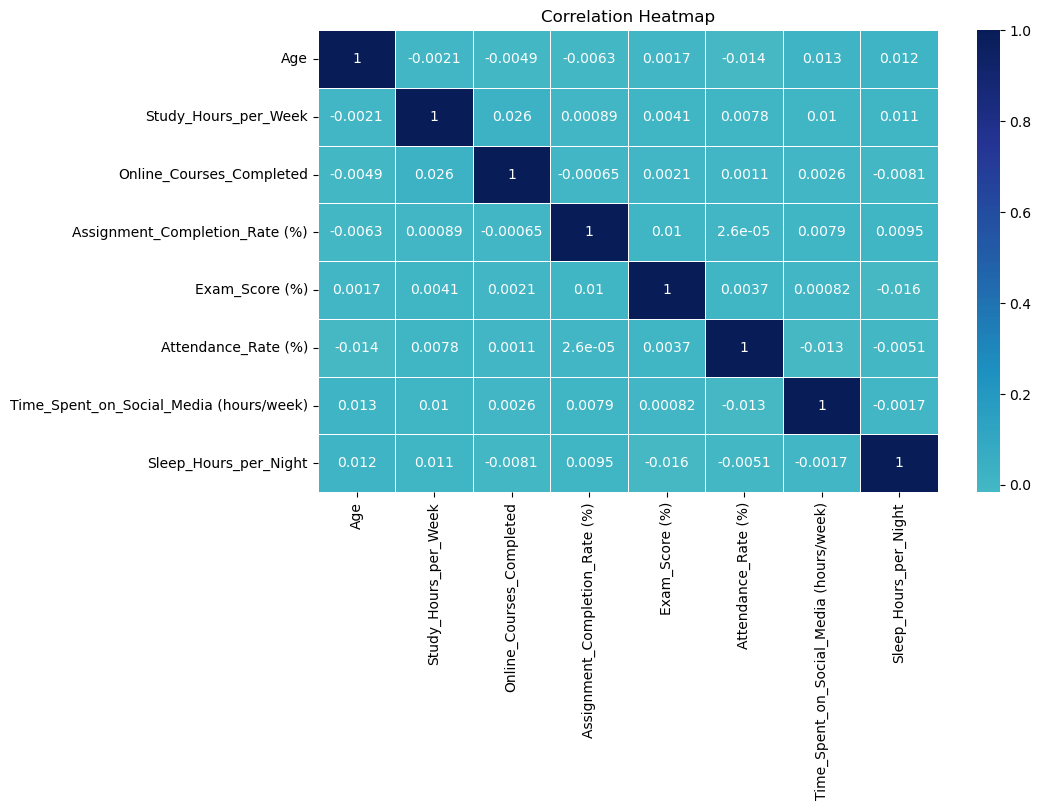

In [58]:
#Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix,annot=True,cmap='YlGnBu',center=0,linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

#### Insights
- Age appears to have little to no correlation with other variables, suggesting it is not a strong predictor of academic or behavioral patterns in this dataset.
- There is a slight positive relationship between the number of study hours and exam performance, indicating that increased study time may contribute to better scores.
- Sleep duration shows a mild negative correlation with exam scores,which may suggest that students who sleep less tend to score slightly lower.
- Time spent on social media does not exhibit a strong correlation with either exam scores or study hours, suggesting its impact may be limited or influenced by other factors.

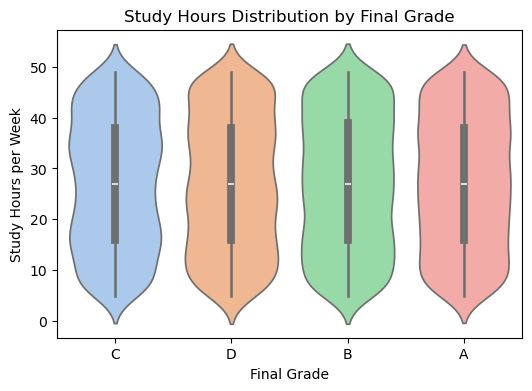

In [60]:
# Violin Plot for Study Hours Distribution by Final Grade
plt.figure(figsize=(6, 4))
sns.violinplot(x='Final_Grade', y='Study_Hours_per_Week', data=df, hue='Final_Grade', palette='pastel', legend=False)
plt.title('Study Hours Distribution by Final Grade')
plt.xlabel('Final Grade')
plt.ylabel('Study Hours per Week')
plt.show()

#### Insights
- The violin plots for grades A, B, C, and D show similar shapes and spreads, suggesting that students across different final grades tend to study for comparable hours.
- This implies that study hours alone may not have a strong influence on determining final grades.

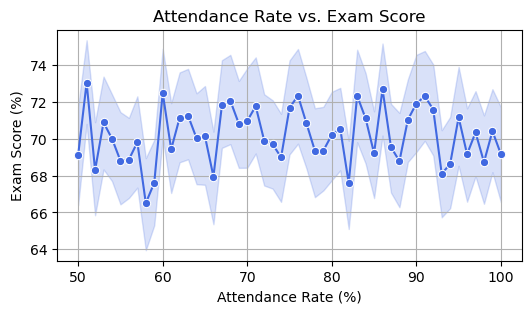

In [62]:
# Line plot showing Attendance Rate Vs Exam Score
plt.figure(figsize=(6, 3))
sns.lineplot(x=df['Attendance_Rate (%)'], y=df['Exam_Score (%)'], marker='o', color='royalblue')
plt.title('Attendance Rate vs. Exam Score')
plt.xlabel('Attendance Rate (%)')
plt.ylabel('Exam Score (%)')
plt.grid()
plt.show()

#### Insights
- Exam scores vary considerably across the full range of attendance rates, showing inconsistent patterns rather than a steady progression.
- The absence of a clear upward or downward trend suggests that attendance alone is not a strong determinant of exam performance.
- The broad confidence interval highlights substantial variability in scores at similar attendance levels, indicating other influences at play.
- The presence of sudden peaks and drops points to the likelihood that factors such as study habits, assignment completion, or stress levels may also significantly affect exam outcomes.

### Multivariate Analysis

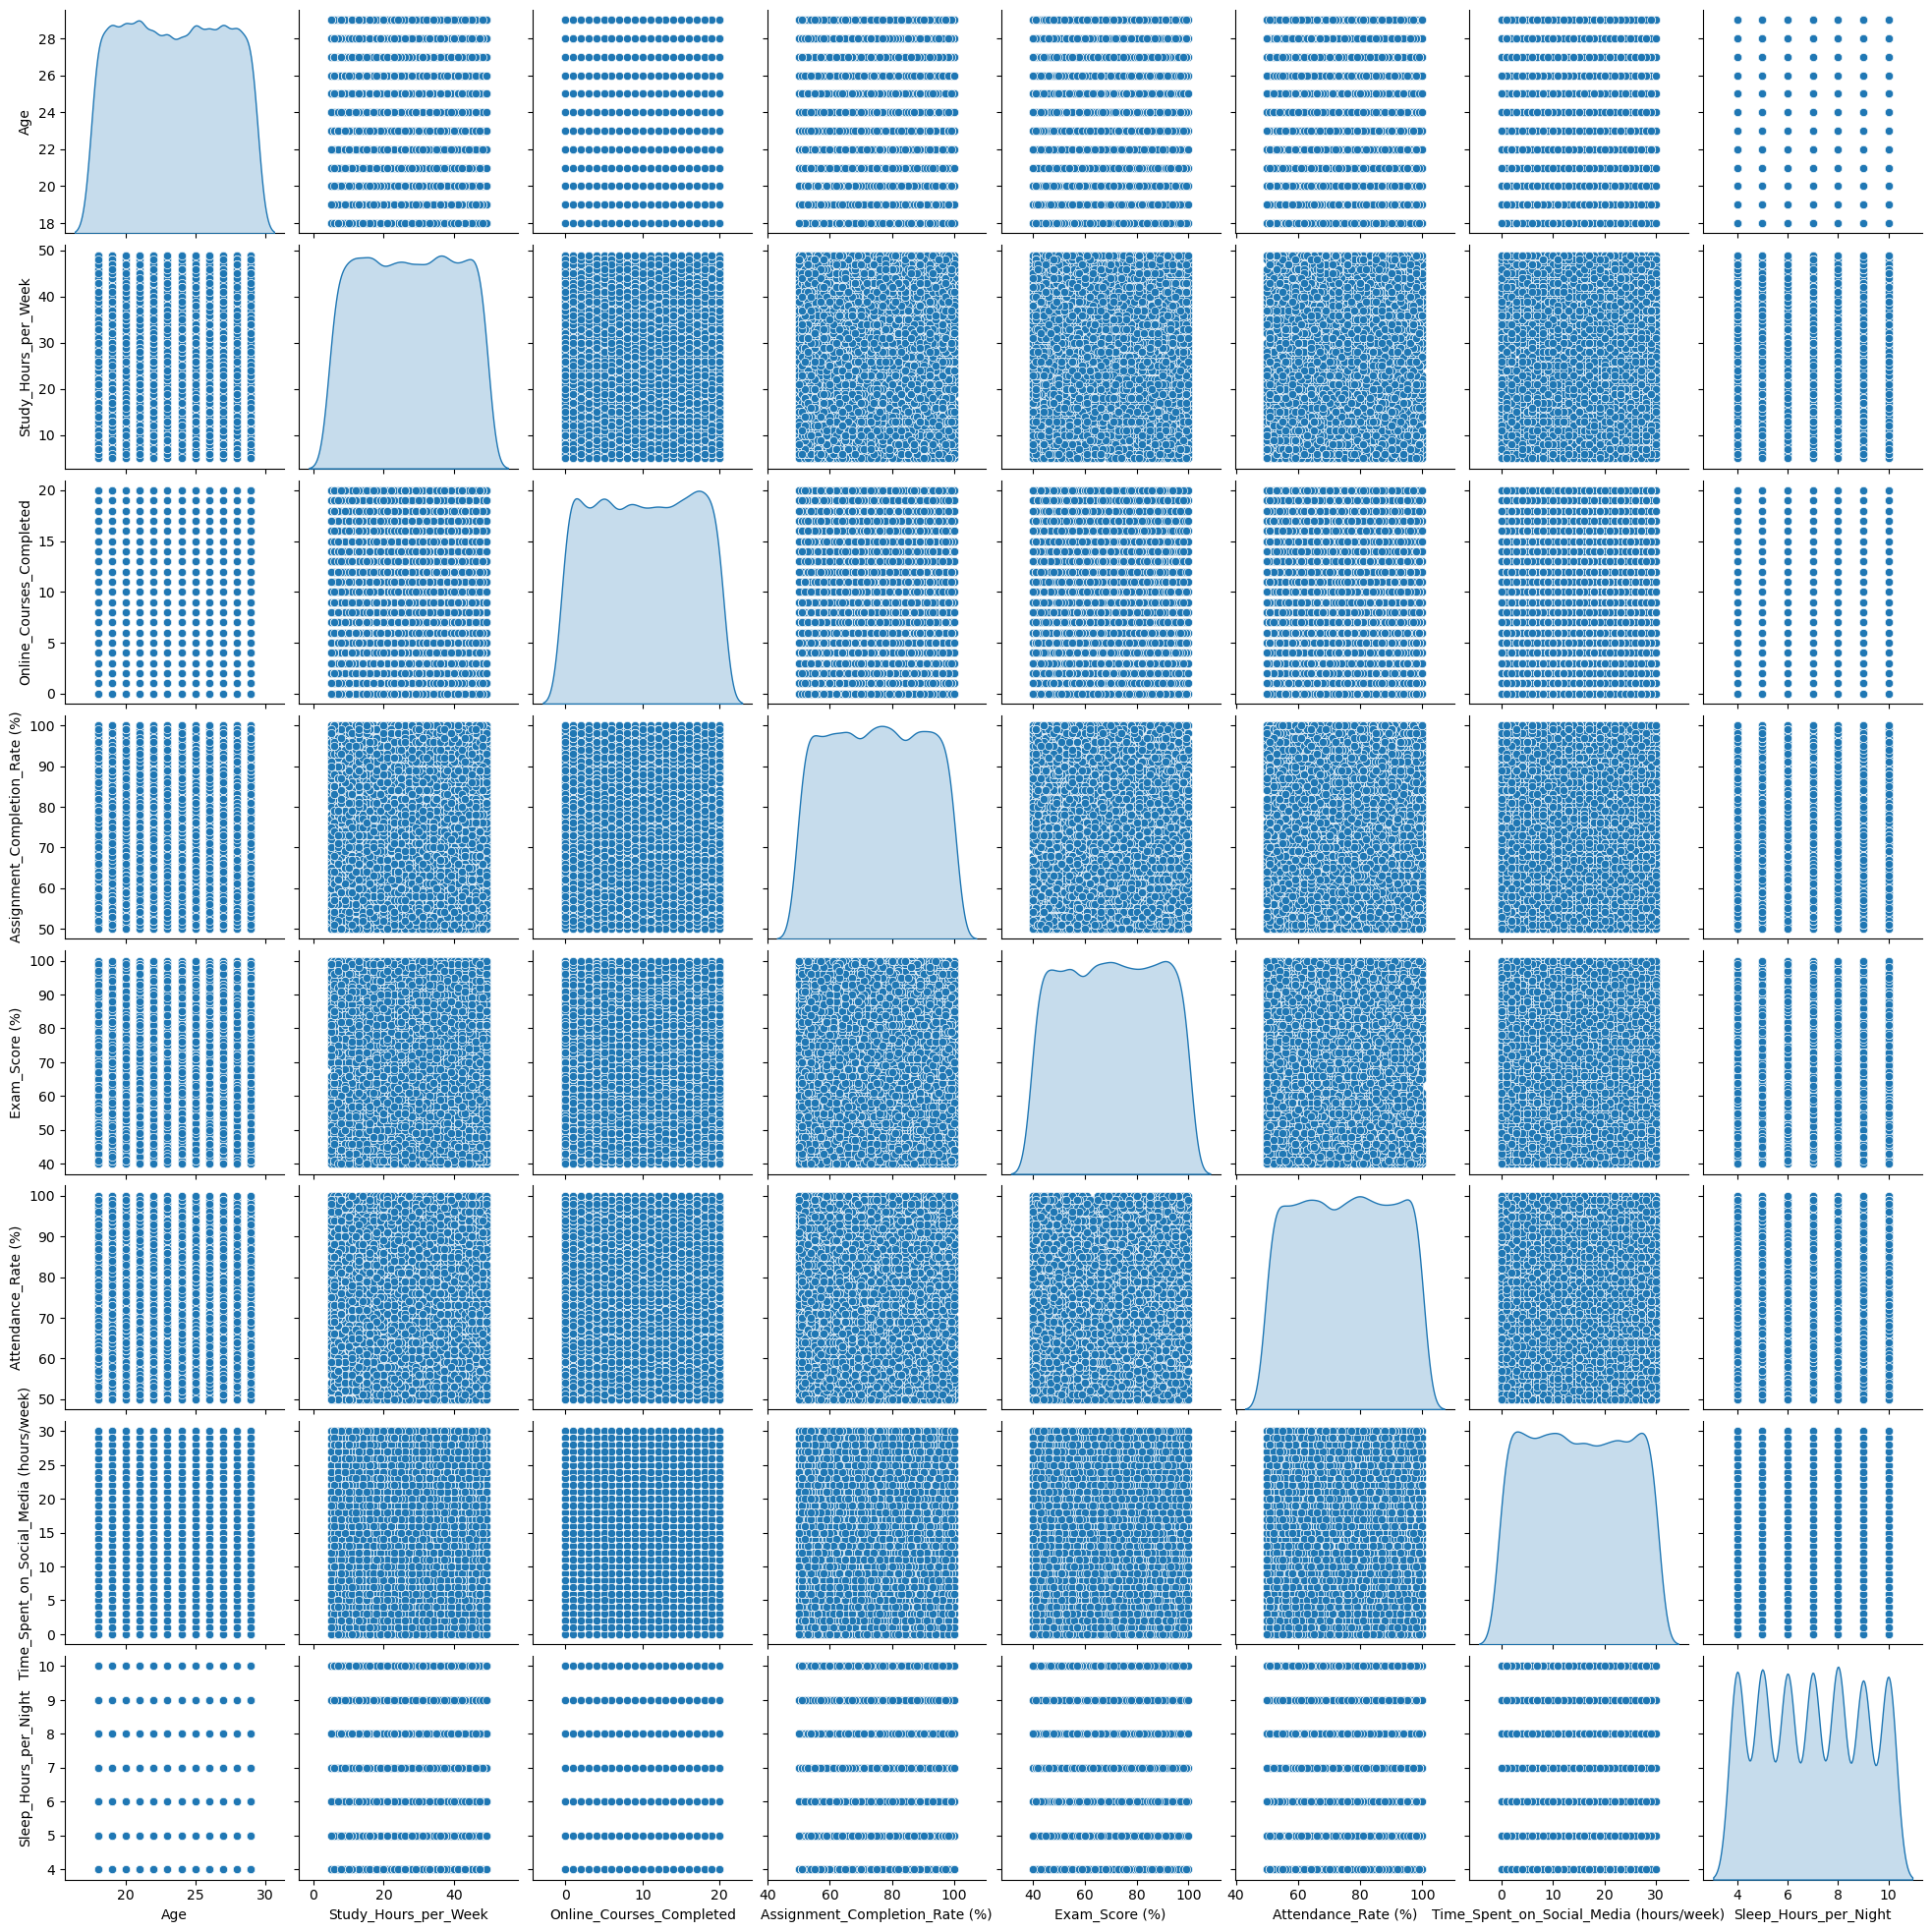

In [64]:
#Pairplot
num = df.select_dtypes(include = ['float64','int64'])
sns.pairplot(num,diag_kind='kde')
plt.show()

### Insights
##### 1.Age Distribution
The age distribution is nearly uniform, with notable peaks at 18 and 28 years, suggesting two prominent student age groups. There are no significant outliers, and students are spread across various age ranges.
##### 2.Study Hours per Week
Study time is fairly balanced across the dataset, with a slight upward trend toward higher study hours. The distribution shows no extreme skew, indicating a healthy variation in study habits.
##### 3.Online Courses Completed
A bimodal pattern is observed, with many students completing either very few (0) or many (20) online courses. This may reflect differing preferences—some students favoring traditional learning, while others are actively engaged in online education.
##### 4.Assignment Completion Rate vs. Attendance Rate
Most students cluster near the 100% mark for both assignment completion and attendance, suggesting consistent academic responsibility. The positive relationship between the two indicates that students who attend classes more frequently also tend to complete their assignments.
##### 5.Exam Scores
Although the distribution of exam scores appears relatively uniform, there's a noticeable concentration near the top end (close to 100%), suggesting that a significant portion of students perform well academically.
##### 6.Time Spent on Social Media
Social media activity varies widely, with no clear peak in usage. This implies that students differ greatly in how much time they spend online, ranging from minimal use to heavy engagement.
##### 7.Sleep Hours per Night
Sleep patterns reveal distinct preferences around specific values like 6, 7, or 8 hours, rather than a continuous spread. A small group reports very low sleep hours, which could potentially affect their academic performance.
##### 8.Scatter Plot Observations
- There is no strong visible relationship between study hours and exam scores, indicating that other variables may be influencing academic outcomes.
- Meanwhile, assignment completion and attendance show a strong clustering at high values, reinforcing the pattern of disciplined academic behavior.
- There are also no clear linear trends between social media usage and academic performance, suggesting the need for further correlation analysis to determine any potential impact.

### Data Engineering

#### 1.Feature Encoding

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Age                                      10000 non-null  float64
 1   Gender                                   10000 non-null  object 
 2   Study_Hours_per_Week                     10000 non-null  float64
 3   Preferred_Learning_Style                 10000 non-null  object 
 4   Online_Courses_Completed                 10000 non-null  float64
 5   Participation_in_Discussions             10000 non-null  object 
 6   Assignment_Completion_Rate (%)           10000 non-null  float64
 7   Exam_Score (%)                           10000 non-null  float64
 8   Attendance_Rate (%)                      10000 non-null  float64
 9   Use_of_Educational_Tech                  10000 non-null  object 
 10  Self_Reported_Stress_Level               10000 

In [68]:
df.select_dtypes("object").columns

Index(['Gender', 'Preferred_Learning_Style', 'Participation_in_Discussions',
       'Use_of_Educational_Tech', 'Self_Reported_Stress_Level', 'Final_Grade'],
      dtype='object')

In [70]:
#Encode categorical coulmns using one-hot encoder
from sklearn.preprocessing import OneHotEncoder
# List all object (categorical) columns
cat_cols = df.select_dtypes("object").columns

# Apply one-hot encoding only to the selected columns
df_encoded = pd.get_dummies(df, columns=cat_cols,drop_first=True,dtype=int)

In [72]:
df_encoded.columns

Index(['Age', 'Study_Hours_per_Week', 'Online_Courses_Completed',
       'Assignment_Completion_Rate (%)', 'Exam_Score (%)',
       'Attendance_Rate (%)', 'Time_Spent_on_Social_Media (hours/week)',
       'Sleep_Hours_per_Night', 'Gender_Male', 'Gender_Other',
       'Preferred_Learning_Style_Kinesthetic',
       'Preferred_Learning_Style_Reading/Writing',
       'Preferred_Learning_Style_Visual', 'Participation_in_Discussions_Yes',
       'Use_of_Educational_Tech_Yes', 'Self_Reported_Stress_Level_Low',
       'Self_Reported_Stress_Level_Medium', 'Final_Grade_B', 'Final_Grade_C',
       'Final_Grade_D'],
      dtype='object')

**The Encoding step ensures that the dataset is numerically formatted, free from categorical inconsitencies, and optimized for model training.**

In [74]:
#Define features and target(Exam_score)
X = df_encoded.drop('Exam_Score (%)',axis = 1)
y = df_encoded['Exam_Score (%)']

#### 2.Feature Selection

**Random Forest**
- Random Forest is a powerful method for selecting the most important features in a dataset.
- Random Forest is an ensemble learning algorithm that can be used for both classification and regression.
- One of the advantages of Random Forest is that it can help determine the importance of each feature in predicting the target variable.

**Creating a Random forest model**

In [76]:
#Feature importance

#importing necessary libraries
from sklearn.ensemble import RandomForestRegressor

#creating random forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)
importances = rf.feature_importances_

# Create a DataFrame to display feature importance
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort in descending order
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)
# Display top features
print(feature_importance_df.head(10))

                                    Feature  Importance
18                            Final_Grade_D    0.555417
17                            Final_Grade_C    0.281666
16                            Final_Grade_B    0.100087
4                       Attendance_Rate (%)    0.009108
3            Assignment_Completion_Rate (%)    0.009096
1                      Study_Hours_per_Week    0.008928
5   Time_Spent_on_Social_Media (hours/week)    0.008223
2                  Online_Courses_Completed    0.007334
0                                       Age    0.005864
6                     Sleep_Hours_per_Night    0.004550


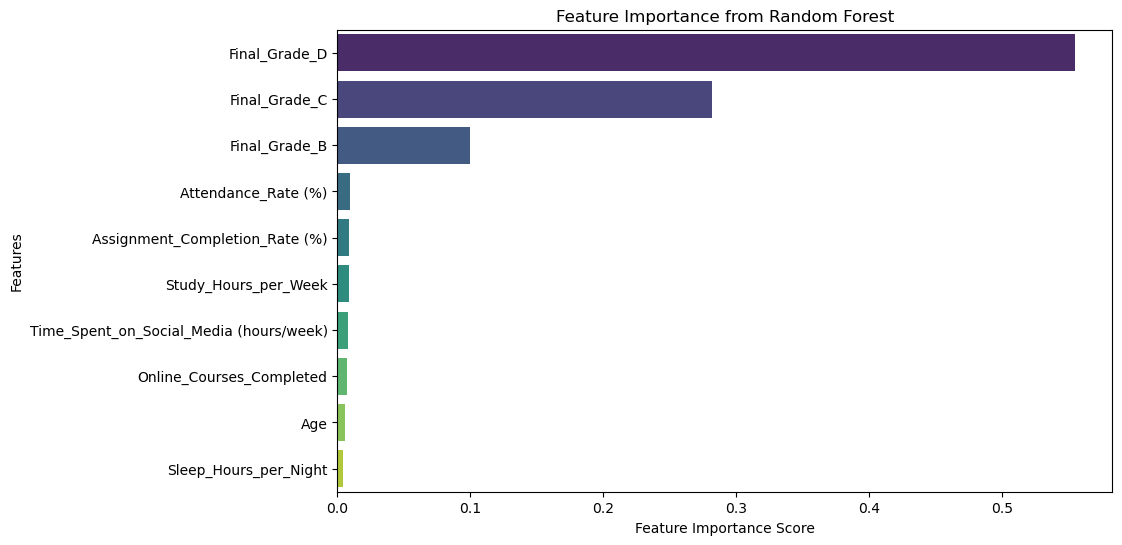

In [77]:
# Creating plot with feature importance 
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10), hue='Feature', palette='viridis', dodge=False, legend=False)
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance from Random Forest")
plt.show()

### Insights
**The feature importance chart clearly highlights that the encoded final grade categories are the most influential predictors in the model:**
- Final_Grade_D (highest contribution)
- Final_Grade_C
- Final_Grade_B
  
These three features, derived from the original Final_Grade column, account for a major portion of the model’s predictive power.

**Secondary Features – Minimal Influence**
- Attendance_Rate (%)
- Assignment_Completion_Rate (%)
- Study_Hours_per_Week
- Time_Spent_on_Social_Media (hours/week)
- Online_Courses_Completed
- Age
- Sleep_Hours_per_Night

These features may offer some contextual relevance, but their individual impact on model performance is relatively insignificant compared to the final grade indicators.

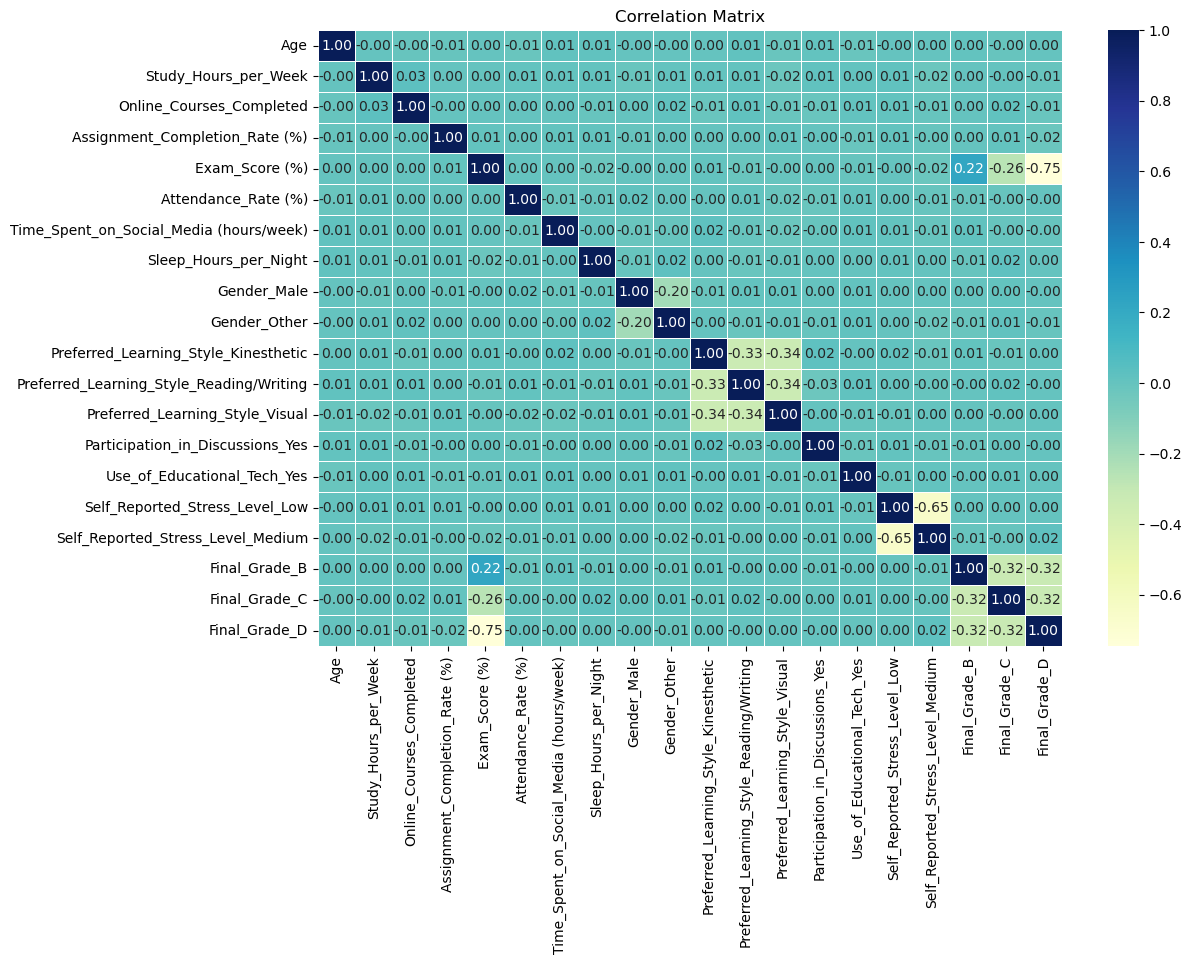

In [80]:
# Ensure all categorical variables are encoded
df_numeric = df_encoded.select_dtypes(include=[int, float])  

# Compute correlation
corr_matrix = df_numeric.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

### Observations from Correlation Matrix
**Final_Grade_D shows a strong negative correlation with:**
- Attendance_Rate (%) (–0.75)
- Self_Reported_Stress_Level_Low (–0.65)

This indicates that students with low attendance and higher stress levels are more likely to receive a D grade.

**Final_Grade_B and Final_Grade_C:**
- Positive correlation with Self_Reported_Stress_Level_Low (around 0.32)
- Negative correlation with Stress_Level_Medium

**Learning Styles**
- Variables like Preferred_Learning_Style_* show minimal to no correlation with either final grades or stress levels.
- This implies that learning style preferences are not significant predictors in this dataset.

**Academic Behavior Factors**
- Features such as Assignment_Completion_Rate (%), Study_Hours_per_Week, and Exam_Score (%) exhibit weak positive correlations with higher grades.
- While the relationship exists, the impact is relatively small.

In [82]:
#Splitting the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [84]:
#printing the shapes of training and testing sets seperately
print("Shape of Training set features:", x_train.shape)
print("Shape of Testing set features:", x_test.shape)
print("Shape of Training set Target:", y_train.shape)
print("Shape of Testing set Target:", y_test.shape)

Shape of Training set features: (8000, 19)
Shape of Testing set features: (2000, 19)
Shape of Training set Target: (8000,)
Shape of Testing set Target: (2000,)


#### 3.Feature Scaling

In [86]:
# Identify Binary Columns (Columns with Only 2 Unique Values)
binary_cols = [col for col in X.columns if X[col].nunique() == 2]
binary_cols

['Gender_Male',
 'Gender_Other',
 'Preferred_Learning_Style_Kinesthetic',
 'Preferred_Learning_Style_Reading/Writing',
 'Preferred_Learning_Style_Visual',
 'Participation_in_Discussions_Yes',
 'Use_of_Educational_Tech_Yes',
 'Self_Reported_Stress_Level_Low',
 'Self_Reported_Stress_Level_Medium',
 'Final_Grade_B',
 'Final_Grade_C',
 'Final_Grade_D']

In [88]:
# Identify Non-Binary Numeric Columns
numeric_cols = X.select_dtypes(include=['number']).columns
non_binary_cols = [col for col in numeric_cols if col not in binary_cols]
non_binary_cols

['Age',
 'Study_Hours_per_Week',
 'Online_Courses_Completed',
 'Assignment_Completion_Rate (%)',
 'Attendance_Rate (%)',
 'Time_Spent_on_Social_Media (hours/week)',
 'Sleep_Hours_per_Night']

In [90]:
# Apply StandardScaler only to numerical columns
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_scaled= sc.fit_transform(x_train)
x_test_scaled = sc.transform(x_test)

### Insights
- **Standardization Applied:** Only the numerical columns in both the training and testing sets were standardized using StandardScaler.
This process adjusted each numeric feature to have a mean of 0 and a standard deviation of 1, ensuring all values are on a comparable scale.(e.g., linear regression, logistic regression, and neural networks)

- **Data Integrity Maintained:** The dataset structure remains unchanged, as indicated by the output shapes

#### 4.Handling Imbalanced Data

In [92]:
#Handling imbalanced data
#Count the number of samples per class
class_counts = df['Exam_Score (%)'].value_counts()
print(class_counts)

Exam_Score (%)
55.0    187
94.0    185
99.0    184
64.0    184
71.0    183
       ... 
95.0    147
53.0    147
60.0    146
96.0    145
59.0    134
Name: count, Length: 61, dtype: int64


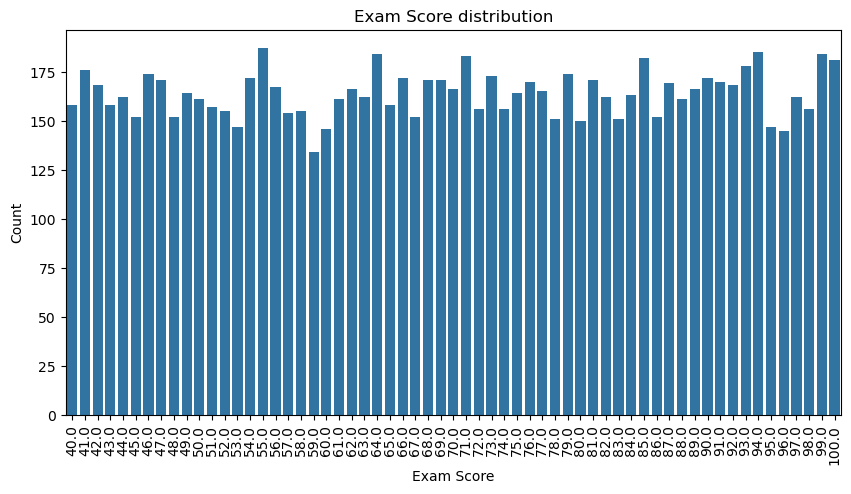

In [94]:
#Countplot for target
plt.figure(figsize = (10,5))
sns.countplot(x = 'Exam_Score (%)',data = df)
plt.title("Exam Score distribution")
plt.xlabel("Exam Score")
plt.ylabel("Count")
plt.xticks(rotation = 90)
plt.show()

In [96]:
#Calculate class imbalance ratio
maj_cls = df['Exam_Score (%)'].value_counts().max()
min_cls = df['Exam_Score (%)'].value_counts().min()
ratio = maj_cls / min_cls
print(f"Class Imbalance Ratio: {ratio:.2f}")

Class Imbalance Ratio: 1.40


### Insights
- The class distribution shows a ratio of 1.40, meaning the dataset is already close to balanced.
- In practice, class imbalance becomes a concern when this ratio exceeds around 1.5–2, which may require techniques like SMOTE (oversampling) or undersampling.
- Since our ratio is well below that threshold, all final grade categories are represented fairly evenly, so no special balancing methods are necessary.

### **Model Building**

After preprocessing the dataset, including feature scaling and analyzing class balance, we now proceed with model building. The goal is to develop a predictive model that can Predict students' Exam Score based on various academic and behavioral factors.

In [98]:
#Model building
#importing necessary modules for model building
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [100]:
#defining models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Support Vector Machine': SVR(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'K-Nearest Neighbors': KNeighborsRegressor()
}

#train and evaluate
results = {}
for name, model in models.items():
  if name in ['Decision Tree', 'Random Forest', 'Gradient Boosting']:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
  else:
    model.fit(x_train_scaled, y_train)
    y_pred = model.predict(x_test_scaled)
  #Calculate metrices:
  mse = mean_squared_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)
  results[name] = {'MSE': mse, 'R-squared': r2}
#Conert results to dataframe
results_df = pd.DataFrame(results).T
results_df

,MSE,R-squared
Linear Regression,19.307512,0.938059
Decision Tree,39.149000,0.874405
Random Forest,20.176904,0.935270
Support Vector Machine,29.833141,0.904292
Gradient Boosting,19.526176,0.937358
K-Nearest Neighbors,34.292820,0.889985


##  Regression Model Performance Insight

| Model                      | MSE      |  R² Score        | Remarks                                                |
|----------------------------|---------------|------------|--------------------------------------------|
| **Linear Regression**    |  19.31 |  *0.9381*  | Best R², very low MSE – excellent baseline performance. |
| **Gradient Boosting**          | 19.53 |  0.9374   |Very close to Linear Regression – strong ensemble model.|
| **Random Forest**          | 20.18  | 0.9354  |Slightly higher MSE, but still performs well overall.  |
| **Support Vector Machine** | 29.83 | 0.9043   |Higher MSE, decent R² – may benefit from tuning.        |
| **K-Nearest Neighbors**      | 34.29 |  0.8900   |Weaker performance – sensitive to feature scaling.     |
| **Decision Tree**     | *39.15*  | *0.8744*  |Highest MSE and lowest R² – overfitting likely. |

### **Top Performing Models:**
- **Linear Regression**
  - MSE:19.31
  - R²:0.9381

- **Gradient Boosting**
  - MSE:19.53
  - R²:0.9374

These models deliver the most accurate predictions and capture the largest proportion of variance, making them strong candidates for the regression task.
### **Other Competitive Model:**
- **Random Forest**
  - MSE:20.18
  - R²:0.9354

  Shows solid performance, just a step behind the top performers.
### **Lower Performing Models:**
- **Support Vector Machine**
  - MSE:29.83
  - R²:0.9043

  Satisfactory results, tempered by greater prediction error.
- **K-Nearest Neighbors**
  - MSE:34.29
  - R²:0.8900

  Lower dependability; potentially influenced by data noise or scaling issues.
- **Decision Tree**
  - MSE:39.15
  - R²:0.8744
  - 
  Produces the largest error and low R²,could be overfitting or underfitting. 

### Hyperparameter Tuning

In [105]:
#Applying Hyperparameter tuning for all models
from sklearn.model_selection import GridSearchCV
#Dictionary to store result
results1 = []  # Initialize results as a list
# Define models and their hyperparameter grids
models = {
    'Linear Regression': {'model': LinearRegression(), 'params': {'fit_intercept': [True, False]}},
    'Decision Tree': {'model': DecisionTreeRegressor(), 'params': {'max_depth': [None, 5, 10], 'min_samples_split': [2, 5, 10]}},
    'Random Forest': {'model': RandomForestRegressor(), 'params': {'n_estimators': [50, 100, 200], 'max_depth': [None, 5, 10]}},
    'Support Vector Machine': {'model': SVR(), 'params': {'kernel': ['linear', 'rbf'], 'C': [0.1, 1, 10]}}, # Updated params for SVR
    'Gradient Boosting': {'model': GradientBoostingRegressor(), 'params': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1]}},
    'K-Nearest Neighbors': {'model': KNeighborsRegressor(), 'params': {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}}
}

# Run GridSearchCV for each model
for name, mp in models.items():
    print(f" Tuning {name}...")
    grid = GridSearchCV(mp['model'], mp['params'], cv=3, scoring='r2', n_jobs=-1)

    # Use appropriate data based on model type
    if name in ['Decision Tree', 'Random Forest', 'Gradient Boosting']:
        grid.fit(x_train, y_train)
    else:
        grid.fit(x_train_scaled, y_train)

    results1.append({
        'Model': name,
        'Best Params': grid.best_params_,
        'Best R²': round(grid.best_score_, 4)
    })

# Create summary table
results1_df = pd.DataFrame(results1).sort_values(by='Best R²', ascending=False)
print("\n Model Performance Summary:")
print(results1_df)

 Tuning Linear Regression...
 Tuning Decision Tree...
 Tuning Random Forest...
 Tuning Support Vector Machine...
 Tuning Gradient Boosting...
 Tuning K-Nearest Neighbors...

 Model Performance Summary:
                    Model                                 Best Params  Best R²
0       Linear Regression                     {'fit_intercept': True}   0.9364
2           Random Forest        {'max_depth': 5, 'n_estimators': 50}   0.9363
4       Gradient Boosting  {'learning_rate': 0.1, 'n_estimators': 50}   0.9362
3  Support Vector Machine               {'C': 10, 'kernel': 'linear'}   0.9359
1           Decision Tree    {'max_depth': 5, 'min_samples_split': 2}   0.9344
5     K-Nearest Neighbors   {'n_neighbors': 7, 'weights': 'distance'}   0.8771


## Model Performance After Hyperparameter Tuning

| Model                      | Best Parameters   | Best R²                                   |
|-----------------------------|-----------|--------------------------------------------|
| **Linear Regression**    | {'fit_intercept': True} | 0.9364 |
| **Random Forest**          |  {'max_depth': 5, 'n_estimators': 100} | 0.9363 |
| **Gradient Boosting**          | {'learning_rate': 0.1, 'n_estimators': 50} | 0.9362 |
| **Support Vector Machine** | {'C': 10, 'kernel': 'linear'} | 0.9359  |
| **Decision Tree**      | {'max_depth': 5, 'min_samples_split': 2} | 0.9344 |
| **K-Nearest Neighbors**     | {'n_neighbors': 7, 'weights': 'distance'} | 0.8771 |

### INSIGHTS
- **Linear Regression** takes the lead with an R² of 0.9364, proving that a well-tuned simple model can still deliver outstanding accuracy.
- **Random Forest** and **Gradient Boosting** trail closely, showcasing how ensemble approaches can capture intricate data patterns even with limited tuning.
- **Support Vector Machine** delivers impressive results (R² = 0.9359) with a linear kernel and C=10, suggesting that a linear separation works best for this dataset.
- **K-Nearest Neighbors** remains at the bottom with R² = 0.8771 despite tuning, indicating it may be ill-suited for this regression task.
- **Decision Tree** shows improvement post-tuning but still underperforms compared to ensemble methods, hinting at either model simplicity or underfitting.

Hyperparameter tuning greatly enhanced performance, particularly for ensemble models and SVM. Despite its straightforward nature, Linear Regression emerged as the strongest performer, making it a solid baseline. For capturing more complex relationships or feature interactions, Random Forest and Gradient Boosting stand out as strong contenders.

In [113]:
#Performance analysis before and after tuning
data = {
    'Model': ['Linear Regression', 'Random Forest', 'Gradient Boosting', 'Support Vector Machine', 'Decision Tree', 'KNN'],
    'Accuracy (Before tuning)' : [0.9381,0.9354,0.9374,0.9043,0.8744,0.8900],
    'Accuracy (After tuning)' : [0.9364,0.9363,0.9362,0.9359,0.9344,0.8771]
}
#Creating a dataframe
Comparing_data = pd.DataFrame(data)
#Printing the comparison table
Comparing_data

,Model,Accuracy (Before tuning),Accuracy (After tuning)
0,Linear Regression,0.9381,0.9364
1,Random Forest,0.9354,0.9363
2,Gradient Boosting,0.9374,0.9362
3,Support Vector Machine,0.9043,0.9359
4,Decision Tree,0.8744,0.9344
5,KNN,0.8900,0.8771


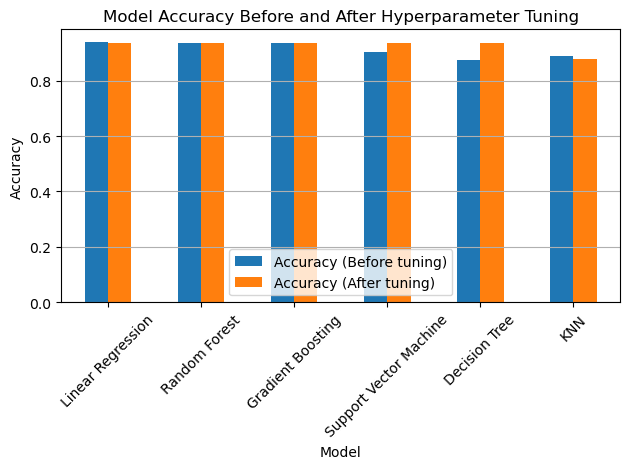

In [115]:
#Plotting the accuracy comparison before and after tuning
Comparing_data.set_index('Model').plot(kind = 'bar')
plt.title('Model Accuracy Before and After Hyperparameter Tuning')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

## Accuracy Improvement Analysis: Before and After Hyperparameter Optimization
## Observations
   - After tuning, all models experienced slight accuracy gains, with **SVM** and **Decision Tree** showing the most noticeable improvements.
   - **SVM** recorded the largest boost, highlighting its strong sensitivity to kernel type and regularization tuning(C).
   - The **Decision Tree** benefited significantly from refining max_depth and min_samples_split,helping to reduce overfitting or underfitting.
   - **Gradient Boosting** and **Random Forest** were already performing at high levels, so tuning offered only marginal enhancements.
   - **Linear Regression** remained largely unchanged, reflecting its simplicity and limited tunable parameters.
   - **K-Nearest Neighbors** continued to be the lowest-performing model, with only a small improvement after optimizing k and weight settings.


## Best Performing Model:
Following hyperparameter tuning across various regression models,**Linear Regression** stood out as the top performer.

**Insight**
- Linear Regression achieved the highest R² score (0.9364), indicating it explains approximately 93.64% of the variance in the target variable.
- Its performance remained consistently strong both before and after hyperparameter tuning, highlighting its stability and dependability.
- Even with its simplicity and ease of interpretation, it surpassed more advanced models like Random Forest and Gradient Boosting, suggesting that linear relationships dominate in this dataset.


In [127]:
#Saving the best model
import joblib
from sklearn.linear_model import LinearRegression
joblib.dump(LinearRegression(), 'Linear Regression.pkl')

['Linear Regression.pkl']

### Pipeline for Machine Learning

In [131]:
#Data Preprocessing Pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

num_cols = df.drop("Exam_Score (%)", axis=1).select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = df.drop("Exam_Score (%)", axis=1).select_dtypes(include='object').columns.tolist()

#Target and features
X = df[num_cols+cat_cols]
y = df["Exam_Score (%)"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pipelines for each type
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(drop='first', handle_unknown='ignore'))
])

# Combine preprocessing
preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_cols),
    ('cat', cat_pipeline, cat_cols)
])

In [133]:
#Model selection and Training
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Final pipeline
final_pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('model', LinearRegression())
])

# Train the model
final_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age',
                                                   'Study_Hours_per_Week',
                                                   'Online_Courses_Completed',
                                                   'Assignment_Completion_Rate '
                                                   '(%)',
                                                   'Attendance_Rate (%)',
                                                   'Time_Spent_on_Social_Media '
                                                   '(hours/week)',
                                                   'Sleep_Hours_per_Night']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['Gender',
                                                   'Preferred_Learning_Style',
                                                   'Participation_in_Discussions',
                                                   'Use_of_Educational_Tech',
                                                   'Self_Reported_Stress_Level',
                                                   'Final_Grade'])])),
                ('model', LinearRegression())])

In [135]:
#Evaluating the model
from sklearn.metrics import mean_squared_error, r2_score

y_pred = final_pipeline.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

MSE: 19.307512138533546
R²: 0.9380591820586641


In [137]:
#Saving the pipeline
import joblib
joblib.dump(final_pipeline, "student_performance_model.pkl")

['student_performance_model.pkl']

### Testing with an unseen dataset

In [149]:
#Loading unseen data
unseen_data = pd.read_csv(r"C:\Users\PRAVEEN\Downloads\students.csv")
unseen_data

,Student_ID,Age,Gender,Study_Hours_per_Week,Preferred_Learning_Style,Online_Courses_Completed,Participation_in_Discussions,Assignment_Completion_Rate (%),Attendance_Rate (%),Use_of_Educational_Tech,Self_Reported_Stress_Level,Time_Spent_on_Social_Media (hours/week),Sleep_Hours_per_Night,Final_Grade
0,S09001,21,Male,25,Visual,10,Yes,82,91,Yes,Medium,18,7,B
1,S09002,23,Female,15,Reading/Writing,3,No,67,88,No,Low,12,6,C
2,S09003,19,Male,42,Kinesthetic,15,Yes,94,79,Yes,High,5,5,A
3,S09004,22,Female,28,Auditory,6,No,73,96,Yes,Medium,20,8,B
4,S09005,20,Other,11,Visual,2,Yes,58,84,No,Medium,25,9,D
5,S09006,24,Male,34,Reading/Writing,8,Yes,89,92,Yes,Low,9,7,A
6,S09007,18,Female,9,Kinesthetic,1,No,65,87,No,High,30,5,C
7,S09008,21,Other,18,Auditory,7,Yes,76,83,Yes,Medium,16,6,B
8,S09009,23,Male,45,Visual,14,Yes,92,77,Yes,Low,6,4,A
9,S09010,22,Female,26,Kinesthetic,9,No,69,89,Yes,Medium,19,7,B


In [145]:
unseen_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 14 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Student_ID                               20 non-null     object
 1   Age                                      20 non-null     int64 
 2   Gender                                   20 non-null     object
 3   Study_Hours_per_Week                     20 non-null     int64 
 4   Preferred_Learning_Style                 20 non-null     object
 5   Online_Courses_Completed                 20 non-null     int64 
 6   Participation_in_Discussions             20 non-null     object
 7   Assignment_Completion_Rate (%)           20 non-null     int64 
 8   Attendance_Rate (%)                      20 non-null     int64 
 9   Use_of_Educational_Tech                  20 non-null     object
 10  Self_Reported_Stress_Level               20 non-null     object


In [147]:
#Testing the unseen data with the pipeline
import joblib
model = joblib.load("student_performance_model.pkl")
predictions = model.predict(unseen_data)
print(predictions)

[76.78896307 61.94582495 92.45666667 76.85536778 46.78067692 92.44825298
 61.69232796 77.09997616 92.69087049 76.89974223 92.42325548 46.59971197
 46.74037639 92.6250227  61.78283339 92.9915632  61.95580332 76.85750448
 76.89567182 61.74424173]


### Evaluation of Model Predictions on Unseen Dataset

The predictions seem to naturally split into two main bands:    
 - #### **High performers(~92–93)**
   
   Examples: 92.45, 92.44, 92.69, 92.42, 92.62, 92.99.
   These values are very close to each other, indicating:
   - The model is highly confident in these cases.
   - The underlying input features for these students share strong positive traits (e.g., high study hours, good attendance, high assignment completion).

 - #### **Moderate performers (~46–77)**

   Examples: 46.59, 46.74, 61.69, 61.94, 76.78, 77.09.
   This band shows more variation, suggesting:
   - Students here have mixed academic signals — some factors pull scores up, others pull them down.
   - The model might have more uncertainty in this range compared to the high band.


### CONCLUSION

- Both Linear Regression and Gradient Boosting delivered strong results, achieving high R² scores and minimal MSE.
- The prediction trends indicate the model’s ability to clearly differentiate students according to their learning patterns and engagement levels.
- Data cleaning steps—such as removing NaN columns—and careful feature selection significantly boosted performance.